Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [ ]:



# Зчитуємо файл train.csv
titanic_df = pd.read_csv('train.csv')

# Виводимо інформацію про кожну колонку
print(titanic_df.info())

# Виводимо перші кілька рядків датафрейму
print(titanic_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

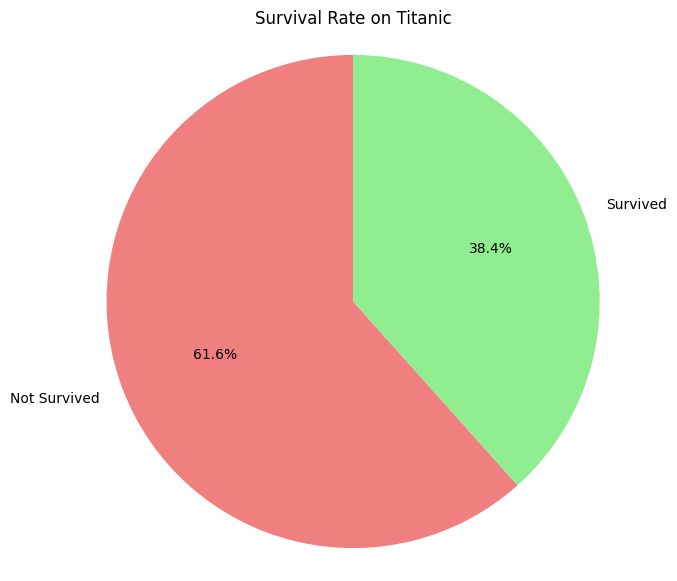

In [ ]:


# Групуємо дані по колонці Survived та підраховуємо кількість значень
survived_count = titanic_df['Survived'].value_counts()

# Створюємо pie chart
plt.figure(figsize=(7, 7))
plt.pie(survived_count, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Survival Rate on Titanic')
plt.axis('equal')  # Забезпечує круглу форму
plt.show()



На круговій діаграмі ми бачимо, що загалом 61.6% пасажирів загинуло, а 38.4% вижили. Це відображає велику кількість жертв катастрофи Титаніка.

Для створення кругової діаграми було використано метод value_counts() для колонки Survived датафрейму titanic_df, щоб отримати кількість виживших і загиблих. Використовуючи бібліотеку Matplotlib, було створено кругову діаграму, що показує відсоткове співвідношення між двома групами.




3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


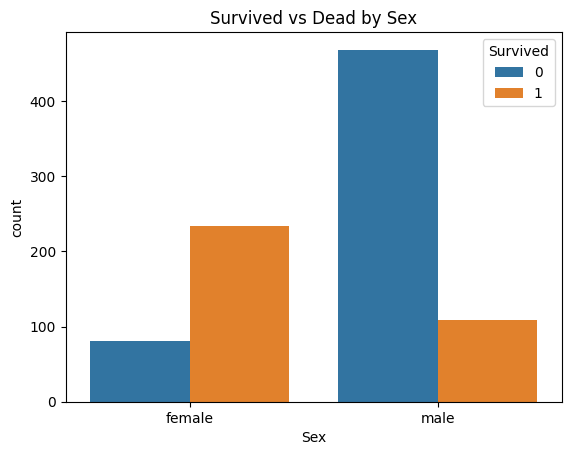

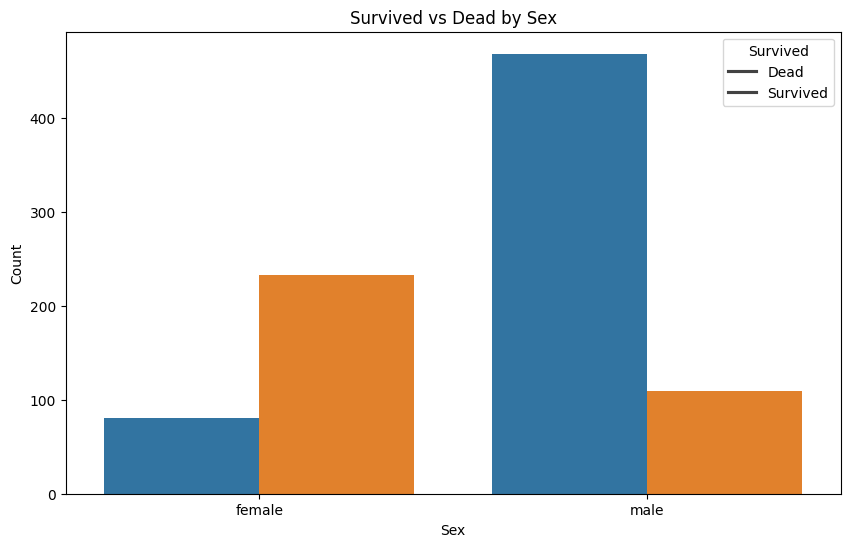

In [ ]:


# Групуємо дані за статтю та статусом виживання
gender_survival_counts = titanic_df.groupby(['Sex', 'Survived'], as_index=False).size()

# Створюємо bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Sex', y='size', hue='Survived', data=gender_survival_counts)
ax.set_title('Survived vs Dead by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
plt.legend(title='Survived', labels=['Dead', 'Survived'])
plt.show()


На стовпчиковій діаграмі показано виживаність за статтю. З нього видно, що жінок вижило значно більше, ніж чоловіків. Це може бути пов'язано з тим, що під час евакуації дотримувалися принципу "жінок та дітей спершу". Через це жінки мали вищі шанси бути врятованими і зайняти місце у човнах для порятунку.

Для створення стовпчикової діаграми спочатку було виконано групування даних за статтю та статусом виживання за допомогою методу groupby() з параметром as_index=False, щоб стать не була індексом, а була колонкою в результуючому датафреймі. Додатково було викликано метод size() для підрахунку кількості записів в кожній групі. Потім, з допомогою бібліотеки Seaborn, було створено стовпчикову діаграму, де колір стовпців позначав статус виживання.




4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

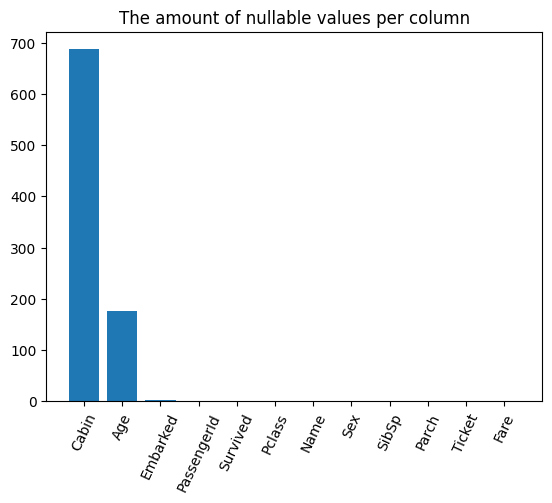

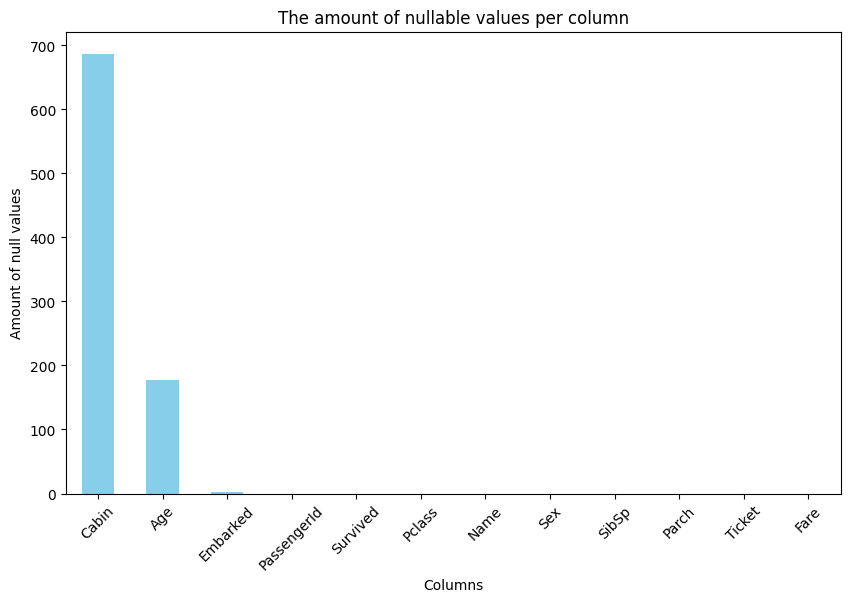

In [ ]:
# Відсортовуємо колонки за кількістю пропущених значень в порядку спадання
null_values_sorted = null_values_all.sort_values(ascending=False)

# Створюємо bar chart для відображення пропущених значень по колонках у відсортованому порядку
plt.figure(figsize=(10, 6))
null_values_sorted.plot(kind='bar', color='skyblue')
plt.title('The amount of nullable values per column')
plt.xlabel('Columns')
plt.ylabel('Amount of null values')
plt.xticks(rotation=45)
plt.show()



Спочатку стовпці сортуються за кількістю пропущених значень у порядку спадання, після чого створюється графік. Кожний стовпчик на графіку представляє стовпець даних, а його висота відображає кількість пропущених значень у цьому стовпці. Заголовок, підписи вісей та розміри графіка також налаштовуються, щоб додати зрозумілість та естетику до візуалізації.

null_values_all містить інформацію про кількість пропущених значень у кожному стовпці даних.
null_values_sorted сортує цю інформацію в порядку спадання, тобто стовпці з найбільшою кількістю пропущених значень розміщуються вгорі.
plt.figure(figsize=(10, 6)) створює нову фігуру графіка з розмірами 10 на 6 дюймів.
null_values_sorted.plot(kind='bar', color='skyblue') створює стовпчикову діаграму, де кожний стовпчик відповідає кількості пропущених значень у відповідному стовпці даних. Колір стовпчиків визначений як небесно-блакитний (skyblue).
plt.title('The amount of nullable values per column') встановлює заголовок діаграми.
plt.xlabel('Columns') та plt.ylabel('Amount of null values') встановлюють підписи для вісі x та y відповідно.
plt.xticks(rotation=45) повертає підписи вісі x на 45 градусів, щоб уникнути перекриття тексту.
plt.show() відображає створений графік.


5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

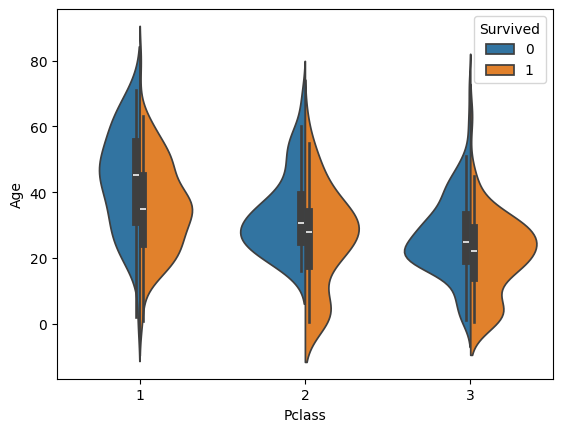

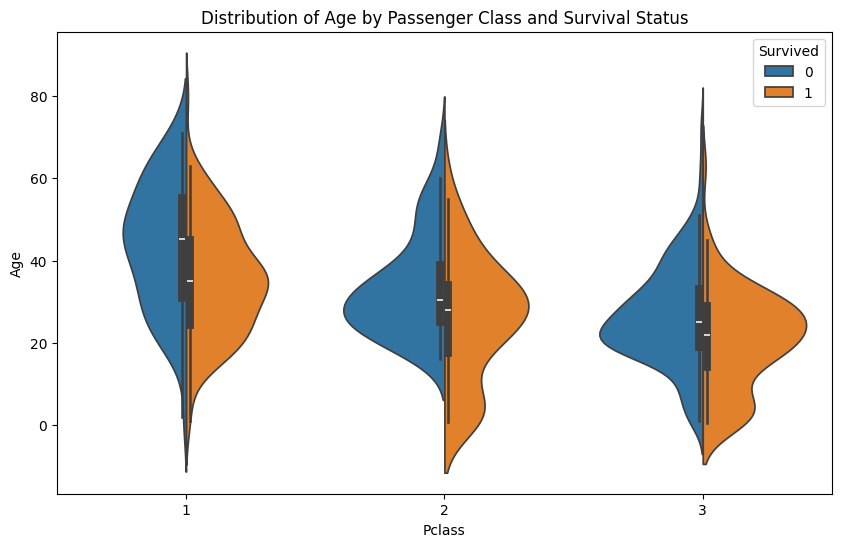

In [ ]:
# Перевіримо, чи є пропущені значення у колонці 'Age', оскільки вони можуть вплинути на візуалізацію
titanic_df['Age'].isnull().sum()

# Для створення violin plot нам потрібно очистити дані від пропущених значень в колонці 'Age'
titanic_cleaned = titanic_df.dropna(subset=['Age'])

# Створимо violin plot для віку за класами кают, розділені за статусом виживання
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_cleaned, split=True)
plt.title('Distribution of Age by Passenger Class and Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.legend(title='Survived')
plt.show()


Візуалізація демонструє розподіл віку пасажирів в залежності від класу каюти та статусу виживання. З цього графіка можна зробити висновок, що в першому та другому класі середній вік виживших був вищий, ніж виживших у третьому класі. Це може свідчити про більш високий рівень захисту або пріоритет при евакуації для пасажирів перших двох класів.

Що робить код?
titanic_df['Age'].isnull().sum() перевіряє кількість пропущених значень у стовпці "Age" даних про пасажирів корабля "Titanic".
titanic_cleaned = titanic_df.dropna(subset=['Age']) очищує дані від рядків, де значення в стовпці "Age" відсутні.
plt.figure(figsize=(10, 6)) створює нову фігуру графіка з розмірами 10 на 6 дюймів.
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=titanic_cleaned, split=True) створює діаграму скрипки, де вік пасажирів подано залежно від їх класу кают ("Pclass") та розділено за статусом виживання ("Survived"). Розподіл віку показано для кожного класу кают та для кожної категорії виживання окремо.
plt.title('Distribution of Age by Passenger Class and Survival Status') встановлює заголовок діаграми.
plt.xlabel('Pclass') та plt.ylabel('Age') встановлюють підписи для вісі x та y відповідно.
plt.legend(title='Survived') вставляє легенду, де "Survived" вказує на статус виживання.
plt.show() відображає створений графік.




6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


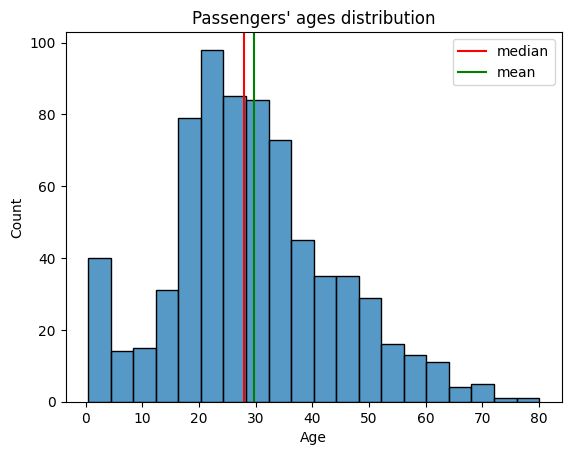

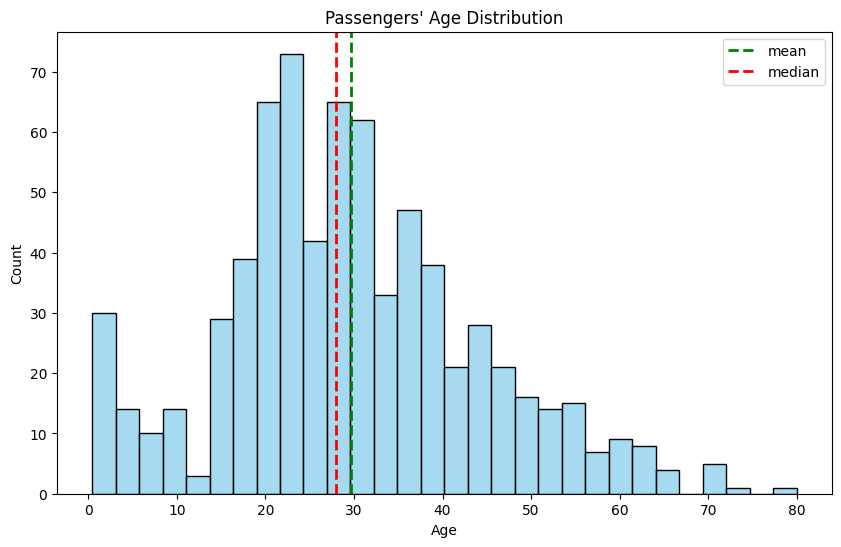

In [ ]:
# Створимо гістограму розподілу віку пасажирів
plt.figure(figsize=(10, 6))
sns.histplot(titanic_cleaned['Age'], bins=30, kde=False, color='skyblue')

# Обчислюємо та відображаємо середнє та медіанне значення віку
mean_age = titanic_cleaned['Age'].mean()
median_age = titanic_cleaned['Age'].median()
plt.axvline(mean_age, color='green', linestyle='dashed', linewidth=2)
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=2)

# Додаємо легенду
plt.legend({'mean':mean_age, 'median':median_age})

plt.title('Passengers\' Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



Гістограма показує розподіл віку пасажирів Titanic. Зелена пунктирна лінія відображає середній вік пасажирів, а червона — медіанний. Можна помітити, що розподіл віку є дещо право-скошеним, з найбільшою кількістю пасажирів віком від 20 до 30 років. Середній вік трохи вищий від медіанного, що вказує на наявність старших пасажирів, які зсувають середнє значення в бік старших вікових груп.

Що робить код?
plt.figure(figsize=(10, 6)) створює нову фігуру графіка з розмірами 10 на 6 дюймів.
sns.histplot(titanic_cleaned['Age'], bins=30, kde=False, color='skyblue') створює гістограму розподілу віку пасажирів на основі даних, де bins=30 вказує на кількість інтервалів для гістограми, kde=False вимикає нормалізовану криву густини, а color='skyblue' встановлює колір гістограми.
mean_age = titanic_cleaned['Age'].mean() та median_age = titanic_cleaned['Age'].median() обчислюють середнє та медіанне значення віку пасажирів.
plt.axvline(mean_age, color='green', linestyle='dashed', linewidth=2) та plt.axvline(median_age, color='red', linestyle='dashed', linewidth=2) додають вертикальні лінії для позначення середнього та медіанного значень віку відповідно. Вони відрізняються кольором (color), типом лінії (linestyle) та товщиною (linewidth).
plt.legend({'mean':mean_age, 'median':median_age}) додає легенду, яка вказує значення середнього та медіанного віку.
plt.title('Passengers\' Age Distribution') встановлює заголовок графіка.
plt.xlabel('Age') та plt.ylabel('Count') встановлюють підписи для вісі x та y відповідно.
plt.show() відображає створений графік.


7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як вартість квитка впливає на виживаність пасажирів на Titanic?"

Це питання може виявити, чи існує кореляція між тим, скільки пасажир заплатив за квиток, і його шансами на виживання. Це може бути корисно для розробки цінової стратегії та визначення того, чи потрібно вносити зміни у рівень послуг або заходи безпеки в залежності від класу обслуговування.

Для відповіді на це питання ми можемо використати scatter plot, щоб візуалізувати взаємозв'язок між ціною квитка (Fare) та виживаністю (Survived), згруповано за класом каюти (Pclass). Це дасть нам уявлення про розподіл цін у контексті виживаності.


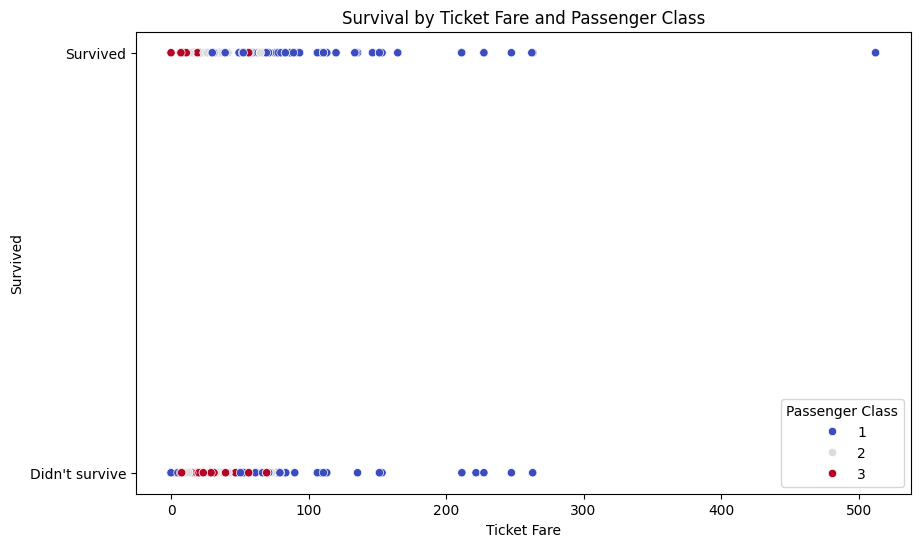

In [ ]:
# Створимо scatter plot для відображення взаємозв'язку між ціною квитка та виживаністю, згруповано за класом каюти
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fare', y='Survived', hue='Pclass', data=titanic_df, palette='coolwarm')
plt.title('Survival by Ticket Fare and Passenger Class')
plt.xlabel('Ticket Fare')
plt.ylabel('Survived')
plt.yticks([0, 1], ['Didn\'t survive', 'Survived'])
plt.legend(title='Passenger Class')
plt.show()



З scatter plot ми можемо спостерігати, що більшість квитків із високою вартістю належать пасажирам першого класу, які також мають більш високі шанси на виживання. Це вказує на потенційну кореляцію між вищою ціною квитка та виживаністю, що може бути пов'язано з кращими умовами або більш швидким доступом до рятувальних шлюпок у випадку надзвичайної ситуації. У другому та третьому класах відношення між ціною квитка та виживаністю виглядає менш вираженим.

Ці дані можуть бути корисними для транспортних компаній, які могли б застосовувати диференційовані цінові стратегії, що відображають рівень безпеки та комфорту для різних класів послуг. Компанії могли б також розглянути можливість зміцнення заходів безпеки для всіх пасажирів, незалежно від класу.


**ЩЕ ОДНЕ БІЗНЕС-Питання**



Інше бізнес-питання, яке ми можемо розглянути, це: "Яка залежність між кількістю родичів на борту (SibSp + Parch) та виживаністю пасажирів?"

Це питання може допомогти зрозуміти, чи впливала наявність сім'ї або родичів на борту на шанси виживання. Ці дані можуть бути важливими для планування розміщення пасажирів на суднах і покращення евакуаційних процедур.

Створимо новий стовпчик "FamilySize" як суму SibSp (кількість братів, сестер або партнерів на борту) і Parch (кількість батьків або дітей). Потім ми візуалізуємо залежність між "FamilySize" та виживаністю за допомогою барплоту

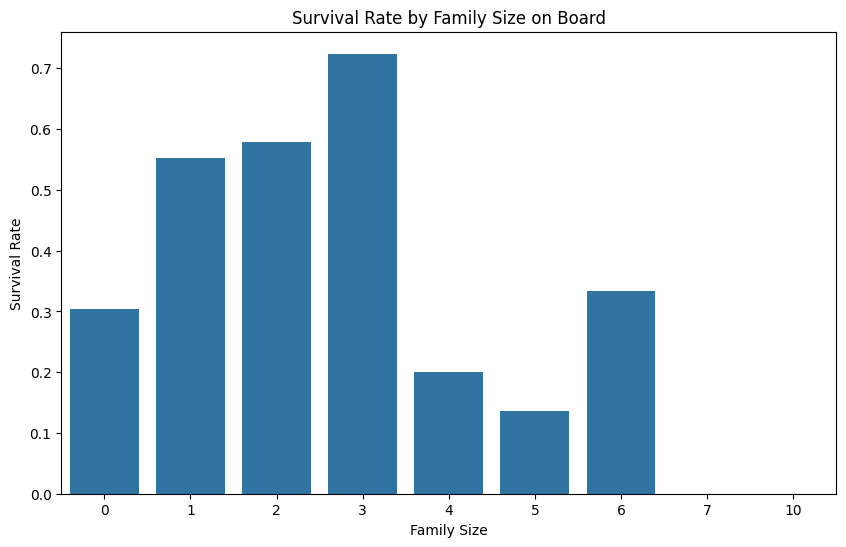

In [ ]:
# Додаємо новий стовпець "FamilySize", що є сумою SibSp і Parch
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

# Визначаємо виживаність залежно від розміру сім'ї
family_survival_rate = titanic_df.groupby('FamilySize')['Survived'].mean().reset_index()

# Створюємо барплот для візуалізації залежності між розміром сім'ї та виживаністю
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=family_survival_rate)
plt.title('Survival Rate by Family Size on Board')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()


# Вітаю! Ви велика(ий) молодець, що впоралась

1.   Новый пункт

1.   Новый пункт
2.   Новый пункт


2.   Новый пункт

(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

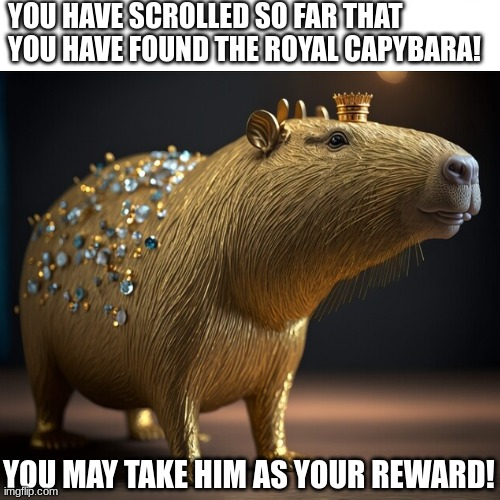